# Setting up Project

In [1]:
!pip3 install py-sudoku

In [2]:
import os
#os.kill(os.getpid(), 9)

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
!mkdir data/
%cp -av "/content/drive/My Drive/sample_train" "data/"
%cp -av "/content/drive/My Drive/sample_test" "data/"
%cp -av "/content/drive/My Drive/model" "data/"
%cp -av "/content/drive/My Drive/demo_test" "data/"

'/content/drive/My Drive/sample_train' -> 'data/sample_train'
'/content/drive/My Drive/sample_test' -> 'data/sample_test'
'/content/drive/My Drive/model' -> 'data/model'
'/content/drive/My Drive/model/working2.h5' -> 'data/model/working2.h5'
cp: cannot stat '/content/drive/My Drive/demo_test': No such file or directory


In [5]:
import uuid
import shutil
from sudoku import Sudoku
import numpy as np
import cv2
import math
import pandas as pd
from PIL import Image
import torch
import time
import torch.nn as nn
import torchvision
import torchvision.transforms.functional as TF
from scipy import ndimage
import matplotlib.pyplot as plt
%matplotlib inline
from imutils.perspective import four_point_transform
import imutils
from google.colab.patches import cv2_imshow
from scipy.optimize import minimize_scalar
np.set_printoptions(threshold=np.inf)
%tensorflow_version 1.x
import tensorflow
print(tensorflow.__version__)

TensorFlow 1.x selected.
1.15.2


In [6]:
!pip install np_utils
!pip install 'h5py==2.10.0'
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model


print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)
#from keras.utils import to_categorical

     |████████████████████████████████| 61 kB 7.7 MB/s 
  Created wheel for np-utils: filename=np_utils-0.5.12.1-py3-none-any.whl size=57131 sha256=ca4b38186fce49f496e7b1618b920a151d87f9a5160be62d80e565612fb30585
  Stored in directory: /root/.cache/pip/wheels/8c/4e/ef/095c24693723c329f4cdc1079861cdbb2487d4b41b2496a4e7
Successfully built np-utils
     |████████████████████████████████| 2.9 MB 29.8 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0


Tensorflow version: 1.15.2
Keras version: 2.2.4-tf


Using TensorFlow backend.


In [7]:
model = load_model("data/model/working2.h5")

AttributeError: ignored

In [8]:
import uuid
import shutil
from sudoku import Sudoku
import numpy as np
import cv2
import math
import pandas as pd
from PIL import Image
import torch
import time
import torch.nn as nn
import torchvision
import torchvision.transforms.functional as TF
from scipy import ndimage
import matplotlib.pyplot as plt
%matplotlib inline
from imutils.perspective import four_point_transform
import imutils
from google.colab.patches import cv2_imshow
from scipy.optimize import minimize_scalar
np.set_printoptions(threshold=np.inf)
%tensorflow_version 1.x
import tensorflow
print(tensorflow.__version__)

1.15.2


In [9]:
def demo_images(dir, imgIDs):
  for ID in imgIDs:
    path = dir + str(ID) + '.png' 
    plt.imshow(plt.imread(path))
    plt.show()

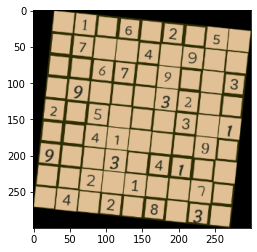

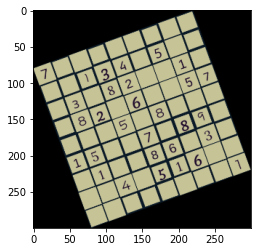

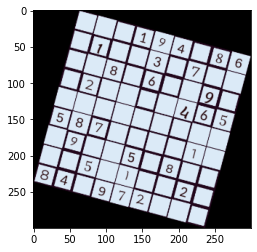

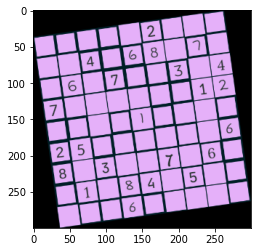

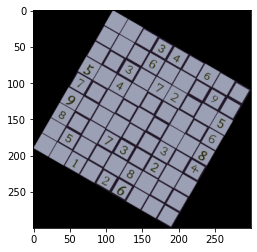

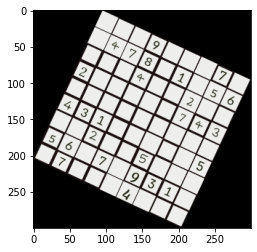

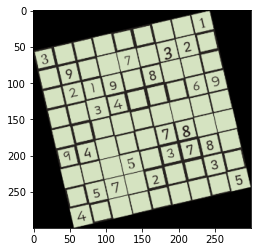

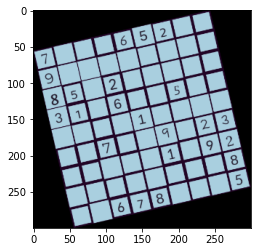

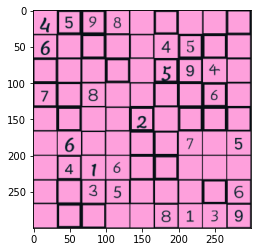

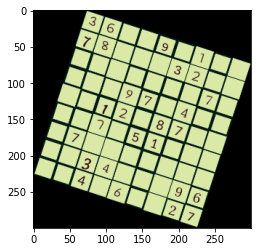

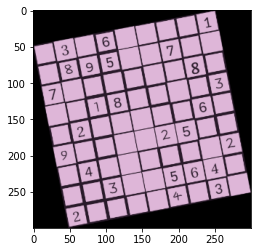

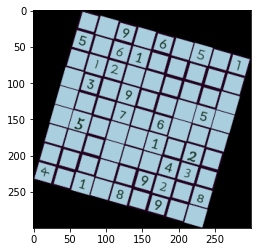

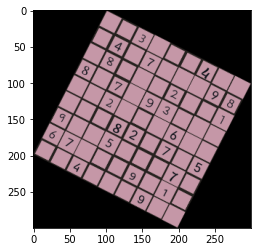

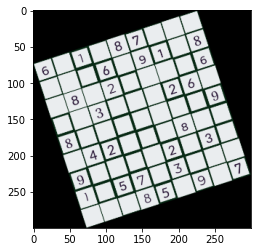

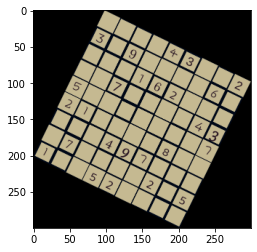

In [10]:
dir = "data/sample_train/" 
imgIDs = []
for i in range(15):
  imgIDs.append(i + 4985)
demo_images(dir, imgIDs)

# Rotating the Image

In [11]:
def pad(src):
    top = int(0.05 * src.shape[0])  # shape[0] = rows
    bottom = top
    left = int(0.05 * src.shape[1])  # shape[1] = cols
    right = left
    #     value = [randint(0, 255), randint(0, 255), randint(0, 255)]

    dst = cv2.copyMakeBorder(src, top, bottom, left, right, cv2.BORDER_CONSTANT, None,[0,0,0])
    return dst

In [12]:
def print_img(img):
  plt.imshow(img)
  plt.show()

In [13]:
# OUTDATED
def gradient(img_gray_scaled):
  gradient_matrix_x = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
  gradient_matrix_y = [[-1, -2, -1], [0, 0, 0], [1, 2, 1]]
  convx = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=3)
  convx.state_dict()['weight'][0][0]=torch.tensor(gradient_matrix_x)
  convy = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=3)
  convy.state_dict()['weight'][0][0]=torch.tensor(gradient_matrix_y)
  grad_x = np.array(convx(img_gray_scaled))
  grad_y = np.array(convy(img_gray_scaled))
  grad_degree = np.atan2(grad_y, grad_x)
  grad_magnitude = np.hypot(grad_x, grad_y)
  grad_magnitude_gray_scaled = 255 * (grad_magnitude / grad_magnitude.max())  
  print_img(grad_magnitude_gray_scaled)
  return grad_magnitude_gray_scaled, grad_degree

In [14]:
def gradient2(img_gray_scaled, demo):
  if (demo):
    print("\nfinding \"edge\" pixels via x and y gradient convolution for detecting changes in pixel intesity:")

  # matrix designed for detecting intensity in x-direction  
  gradient_matrix_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

  # matrix designed for detecting intensity in y-direction
  gradient_matrix_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

  # convolution to get intensities via matrices
  grad_x = ndimage.filters.convolve(img_gray_scaled, gradient_matrix_x)
  grad_y = ndimage.filters.convolve(img_gray_scaled, gradient_matrix_y)

  # magnitude of intensities
  grad_magnitude = np.hypot(grad_y, grad_x)

  # gray scaled magnitudes
  grad_magnitude_gray_scaled = 255 * (grad_magnitude / grad_magnitude.max())
   
  return grad_magnitude_gray_scaled

In [15]:
from scipy import stats

# OUTDATED
def gradient3(img_gray_scaled):
  gradient_matrix_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
  gradient_matrix_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
  grad_x = ndimage.filters.convolve(img_gray_scaled, gradient_matrix_x)
  grad_y = ndimage.filters.convolve(img_gray_scaled, gradient_matrix_y)
  grad_magnitude = np.hypot(grad_y, grad_x)
  grad_magnitude_gray_scaled = 255 * (grad_magnitude / grad_magnitude.max()) 
  grad_degree = 180*np.arctan2(grad_y, grad_x)/math.pi
  print(grad_degree)
  angle_check_1_x, angle_check_1_y = np.where(grad_degree >= 60)
  angles_1 = []
  for row, col in zip(angle_check_1_x, angle_check_1_y):
    angles_1.append(grad_degree[row, col])
  print(np.median(angles_1), stats.mode(angles_1))  
  angle_check_2_x, angle_check_2_y = np.where(grad_degree >= 60)

  print("degree", np.median(grad_degree), np.average(grad_degree))
  #print(grad_magnitude_gray_scaled.dtype) 
  return grad_magnitude_gray_scaled

In [16]:
def edge_threshold(grad_magnitude_gray_scaled, threshold, demo):
    edges = np.zeros((grad_magnitude_gray_scaled.shape[0], grad_magnitude_gray_scaled.shape[1]), dtype=np.uint8)
    above_value = np.uint8(255)

    # finds rows and cols with intensity above threshold and makes those 255 in a new image  
    above_rows, above_cols = np.where(grad_magnitude_gray_scaled >= threshold)
    edges[above_rows, above_cols] = above_value
    if (demo):
        print_img(edges)
    return edges

In [17]:
def add_values(values, first_value, last_value, value_increment):
  value = first_value 
  while (value <= last_value):
    values.append(value)
    value += value_increment
  return values  

In [18]:
# OUTDATED
def accumulator(edge_pixels, threshold, first_degree1, last_degree1, first_degree2, last_degree2, degree_increment):
    max_d = int(max_line_length(edge_pixels))
    acc = np.zeros((max_d * 2, 180), dtype=np.uint8)
    degrees = []
    above_rows, above_cols = np.where(edge_pixels == 255)
    degrees = add_degrees(degrees, first_degree1, last_degree1, degree_increment)  
    degrees = add_degrees(degrees, first_degree2, last_degree2, degree_increment)  
    for row, col in zip(above_rows, above_cols):
      for degree in degrees:
        radian = np.deg2rad(degree)
        distance = int(row * math.cos(radian) + col * math.sin(radian)) + max_d
        #print (degree, radian, distance - max_d)
        acc[distance, degree] += 1     
    above_distances_lines, above_degrees_lines = np.where(acc >= threshold) 
    print(above_distances_lines, above_degrees_lines)
    return above_distances_lines, above_degrees_lines 

In [19]:
def construct_accumulator(distances_checking, degrees_checking):
  # sets up the voting for user inputed degree ranges (and hard coded distances)
  acc = {}  
  for distance in distances_checking:
    for degree in degrees_checking:
      acc[distance, degree] = 0
  return acc  

In [20]:
def accumulator3(edge_pixels, threshold, first_degree1, last_degree1, first_degree2, last_degree2, degree_increment, negative_angle):
    max_d = int(max_line_length(edge_pixels))
    distances_checking = []
    distances_checking = add_values(distances_checking, -max_d, max_d, 1)
    degrees_checking = []
    degrees_checking = add_values(degrees_checking, first_degree1, last_degree1, degree_increment)  
    degrees_checking = add_values(degrees_checking, first_degree2, last_degree2, degree_increment)  
    acc = construct_accumulator(distances_checking, degrees_checking)
    above_rows, above_cols = np.where(edge_pixels == 255)
    for row, col in zip(above_rows, above_cols):
      # pseudo probabalistic factor (only 1/9 pixels checked, cuts down time)
      if (row%3 != 0 or col%3 != 0):
        continue
      for degree in degrees_checking:

        #calculate line (p, theta) and update accumulator (voting mechanism)
        radian = np.deg2rad(degree)
        distance = int(row * math.cos(radian) + col * math.sin(radian))
        acc[distance, degree] += 1
    above_distances_lines, above_degrees_lines = find_lines_percentage(acc, threshold)
    return above_distances_lines, above_degrees_lines 

In [21]:
# OUTDATED
def accumulator2(edge_pixels, threshold, first_degree1, last_degree1, first_degree2, last_degree2, degree_increment):
    max_d = int(max_line_length(edge_pixels))
    acc = np.zeros((max_d * 2, 180), dtype=np.uint8)
    degrees = []
    above_rows, above_cols = np.where(edge_pixels == 255)
    board_height = above_rows.max() - above_rows.min()
    board_width = above_cols.max() - above_cols.min()
    cutoff_decimal = 0.25
    degrees = add_values(degrees, first_degree1, last_degree1, degree_increment)  
    degrees = add_values(degrees, first_degree2, last_degree2, degree_increment)  
    for row, col in zip(above_rows, above_cols):
      if row > ((cutoff_decimal * board_height) + above_rows.min()) and (col > (cutoff_decimal * board_width) + above_cols.min()):
        continue
      for degree in degrees:
        radian = np.deg2rad(degree)
        distance = int(row * math.cos(radian) + col * math.sin(radian)) + max_d
        #print (degree, radian, distance - max_d)
        acc[distance, degree] += 1     
    above_distances_lines, above_degrees_lines = np.where(acc >= threshold)    
    return above_distances_lines, above_degrees_lines 

In [22]:
# OUTDATED
def compute_lines(distances, degrees, edge_pixels, max_d, demo):
  line_img = np.zeros((edge_pixels.shape[0], edge_pixels.shape[1]), dtype=np.uint8)
  lines = []
  angles = []
  for distance, degree in zip(distances, degrees):

    # image is "rotated" already so lines need to be adjusted as well to find needed rotation for our eyes :(        
    #print(degree + 90)  
    a_offset=math.cos(np.deg2rad(degree + 90))
    b_offset=math.sin(np.deg2rad(degree + 90))          
    offsetx0=(distance - max_d)*a_offset
    offsety0=(distance - max_d)*b_offset  

    # find points on the same line
    offsetx1=int(offsetx0 - 1000* b_offset)
    offsety1=int(offsety0 + 1000* a_offset)
    offsetx2=int(offsetx0 + 1000* b_offset)
    offsety2=int(offsety0 - 1000 * a_offset)

    # calculate angle of line from the two points
    angle = math.degrees(math.atan2((offsety2 - offsety1),(offsetx2 - offsetx1)))

    # demo threshold: shouldn't be necessary if accumulator screens properly
    if ((angle >= 60 and angle <= 90) or (angle >= 0 and angle <= 30)):
      angles.append(angle) 

  median_angle = np.median(angles)  
  if (demo):
    print_lines(distances, degrees, edge_pixels, line_img, median_angle, max_d)             
  return median_angle

In [23]:
def compute_lines2(distances, degrees, edge_pixels, demo):
  line_img = 0
  lines = []
  angles = []
  for distance, degree in zip(distances, degrees):
    #print(degree + 90) 
    # image is "rotated" already so lines need to be adjusted as well to find needed rotation for our eyes :(
    a_offset=math.cos(np.deg2rad(degree + 90))
    b_offset=math.sin(np.deg2rad(degree + 90))          
    offsetx0=(distance)*a_offset
    offsety0=(distance)*b_offset  

    # find points on the same line
    offsetx1=int(offsetx0 - 1000* b_offset)
    offsety1=int(offsety0 + 1000* a_offset)
    offsetx2=int(offsetx0 + 1000* b_offset)
    offsety2=int(offsety0 - 1000 * a_offset)

    # calculate angle of line from the two points    
    angle = (180/math.pi) * (math.atan2((offsety2 - offsety1),(offsetx2 - offsetx1)))

    if (demo):
      # demo threshold: shouldn't be necessary normally if accumulator screens properly
      if ((angle > 0 and angle <= 30) or (angle < 0 and angle >= -30)):
        angles.append(angle) 
    else:
      angles.append(angle) 

  median_angle = np.median(angles)  
  if (demo):
    print_lines2(distances, degrees, edge_pixels, line_img, median_angle)             
  return median_angle

In [24]:
# OUTDATED
def print_lines(distances, degrees, edge_pixels, line_img, median, max_d):
  lines = []
  angles = []
  line_img = np.zeros((edge_pixels.shape[0], edge_pixels.shape[1]), dtype=np.uint8)
  for distance, degree in zip(distances, degrees):

    # for showing lines (see next) 
    a=math.cos(np.deg2rad(degree))
    b=math.sin(np.deg2rad(degree))
    x0=(distance - max_d)*a
    y0=(distance - max_d)*b  

    # image is "rotated" already so lines need to be adjusted as well to find needed rotation for our eyes :(
    a_offset=math.cos(np.deg2rad(degree + 90))
    b_offset=math.sin(np.deg2rad(degree + 90))          
    offsetx0=(distance - max_d)*a_offset
    offsety0=(distance - max_d)*b_offset  

    # making sure lines appear: finding far apart points   
    x1=int(x0+1000*(-b))
    y1=int(y0+1000*(a))
    x2=int(x0-1000*(-b))
    y2=int(y0-1000*(a))

    # find another point on the same line
    offsetx1=int(offsetx0 - 1000* b_offset)
    offsety1=int(offsety0 + 1000* a_offset)
    offsetx2=int(offsetx0 + 1000* b_offset)
    offsety2=int(offsety0 - 1000 * a_offset)

    angle = math.degrees(math.atan2((offsety2 - offsety1),(offsetx2 - offsetx1)))
    
    # sets of lines are perpendicular: from the median of the first set of lines, find the second set as well 
    if ((angle > median + 88.5 and angle < median + 91.5) or (angle > median - 1 and angle < median + 1 )):
      # draw line          
      cv2.line(line_img,(y1, x1),(y2, x2),(100,100,100),2)   
  print_img(line_img)

In [25]:
def print_lines2(distances, degrees, edge_pixels, line_img, median):
  lines = []
  angles = []
  line_img = np.zeros((edge_pixels.shape[0], edge_pixels.shape[1]), dtype=np.uint8)
  for distance, degree in zip(distances, degrees):

    # for showing lines (see next) 
    a=math.cos(np.deg2rad(degree))
    b=math.sin(np.deg2rad(degree))
    x0=(distance)*a
    y0=(distance)*b  

    # image is "rotated" already so lines need to be adjusted as well to find needed rotation for our eyes :(
    a_offset=math.cos(np.deg2rad(degree + 90))
    b_offset=math.sin(np.deg2rad(degree + 90))          
    offsetx0=(distance)*a_offset
    offsety0=(distance)*b_offset  

    # making sure lines appear: finding far apart points   
    x1=int(x0+1000*(-b))
    y1=int(y0+1000*(a))
    x2=int(x0-1000*(-b))
    y2=int(y0-1000*(a))

    # find another point on the same line
    offsetx1=int(offsetx0 - 1000* b_offset)
    offsety1=int(offsety0 + 1000* a_offset)
    offsetx2=int(offsetx0 + 1000* b_offset)
    offsety2=int(offsety0 - 1000 * a_offset)


    angle = math.degrees(math.atan2((offsety2 - offsety1),(offsetx2 - offsetx1)))
    
    # sets of lines are perpendicular: from the median of the first set of lines, find the second set as well 
    if ((angle > median + 88.5 and angle < median + 91.5) or (angle > median - 1 and angle < median + 1 )):
      # draw line          
      cv2.line(line_img,(y1, x1),(y2, x2),(100,100,100),2)   
  print("lines found by scoring algorithm (both sets):")
  print_img(line_img) 
  print("rotating image by the median of line angles found for one set:")

In [26]:
def max_line_length(img):
  width = img.shape[0]
  height = img.shape[1]
  return np.hypot(width, height)

In [27]:

# method of defining lines via the amount of edge pixels (defined with threshold)
# that it "intersects" as per checked angles and distances  
def find_lines(acc, threshold):  
   above_distances_lines = []
   above_degrees_lines = [] 
   for distance, degree in acc.keys():     
     if acc[distance, degree] >= threshold:
       above_distances_lines.append(distance)
       above_degrees_lines.append(degree)
   return above_distances_lines, above_degrees_lines 

In [28]:

# method of finding lines based on percentile (threshold_percentage), where score is based on 
# "intersected" edge pixels as with the first method 
def find_lines_percentage(acc, threshold_percentage):  
   above_distances_lines = []
   above_degrees_lines = [] 
   values = sorted(acc.values())
   minimum = int(len(values) * (threshold_percentage / 100)) 
   threshold = values[minimum] 
   for distance, degree in acc.keys():     
     if acc[distance, degree] >= threshold:
       above_distances_lines.append(distance)
       above_degrees_lines.append(degree)
   #print(above_distances_lines)
   #print(above_degrees_lines)
   return above_distances_lines, above_degrees_lines

In [29]:
# OUTDATED
def read4(str, demo = False):  
    img_before = cv2.imread(str) 
    img_before = pad(img_before)
    img_gray = cv2.cvtColor(img_before, cv2.COLOR_BGR2GRAY)    
    edge_pixels = edge_threshold(gradient2(img_gray), 10, demo)
    above_distances_lines = 0
    above_degrees_lines = 0
    if (demo):
        above_distances_lines, above_degrees_lines = accumulator(edge_pixels, 200, 0, 179, 0, 0, 1)
    else:
        above_distances_lines, above_degrees_lines = accumulator(edge_pixels, 200, 0, 30, 60, 89, 1)
    median_angle = compute_lines(above_distances_lines, above_degrees_lines, edge_pixels, max_line_length(edge_pixels), demo)    
    if (median_angle < 1 or median_angle > 89):
      return img_before
    elif (median_angle > 45):
      print("rotating", 90 - median_angle, "degrees")
      img_rotated = ndimage.rotate(img_before, 90 - median_angle)
      return img_rotated
    else:  
      print("rotating", - median_angle, "degrees")
      img_rotated = ndimage.rotate(img_before,median_angle)
      return img_rotated

In [30]:
def read5(str, demo = False, test = False):  
    img_before = cv2.imread(str)     
    img_before = pad(img_before)
    img_gray = cv2.cvtColor(img_before, cv2.COLOR_BGR2GRAY)  
    edge_pixels = edge_threshold(gradient2(img_gray, demo), 10, demo)
    negative_angle = -1
    estimate_angle = corner_rotation(edge_pixels, demo, test)  

    # image is upright, therefore no need to rotate    
    if (estimate_angle == 0):
      return img_before

    # switching from angle to rotate for straightening to angle it is at     
    estimate_angle = -estimate_angle 

    if (estimate_angle > 0):
      negative_angle = True 
    else:
      negative_angle = False

    above_distances_lines = 0
    above_degrees_lines = 0
    if (demo):
        print("scoring lines via the amount of edge pixels captured by a line defined by polar coordinates (angle, distance)")
        above_distances_lines, above_degrees_lines = accumulator3(edge_pixels, 99, estimate_angle - 2.5, estimate_angle + 2.5, estimate_angle + 87.5, estimate_angle + 92.5, 0.5, negative_angle)
    else:
        above_distances_lines, above_degrees_lines = accumulator3(edge_pixels, 99, estimate_angle - 2.5, estimate_angle + 2.5, 0, -1, 0.5, negative_angle)
    
    median_angle = compute_lines2(above_distances_lines, above_degrees_lines, edge_pixels, demo)    

    # algo has found the "positive" angle (median_angle), and assumes the correct
    # method to rotate is the closest upright position
    if (median_angle > 45):
      if (not test):
        print("rotating", 90 - median_angle, "degrees")
        print("estimate adjusted by", estimate_angle - median_angle, "degrees")
      img_rotated = ndimage.rotate(img_before, 90 - median_angle)      
      return img_rotated
    else:  
      if (not test):
        print("rotating", -median_angle, "degrees")
        print("estimate adjusted by", estimate_angle - median_angle, "degrees")    
      img_rotated = ndimage.rotate(img_before, -median_angle)
      return img_rotated

In [31]:
def corner_rotation(edge_pixels, demo = False, test = False):  
  if (demo):   
    print("estimating angle from corners of edge pixel image:")   
  edge_rows, edge_cols = np.where(edge_pixels == 255)

  # finding the four corners
  min_row = edge_rows.min()
  min_row_col = 0
  for i in edge_cols:                        
    if edge_pixels[min_row][i] == 255:
       min_row_col = i
       break
  max_row = edge_rows.max()
  max_row_col = 0 
  for i in edge_cols:                        
    if edge_pixels[max_row][i] == 255:
       max_row_col = i
       break
  min_col = edge_cols.min()
  min_col_row = 0
  for i in edge_rows:                        
    if edge_pixels[i][min_col] == 255:
       min_col_row = i
       break
  max_col = edge_cols.max()  
  max_col_row = 0
  for i in edge_rows:
    if edge_pixels[i][max_col] == 255:
      max_col_row = i
      break  
  if (demo):    
    print("four corners:")   
    print("(" + str(min_row) + "," + str(min_row_col) + ")")   
    print("(" + str(max_row) + "," + str(max_row_col) + ")") 
    print("(" + str(min_col_row) + "," + str(min_col) + ")")
    print("(" + str(max_col_row) + "," + str(max_col) + ")") 

  if (abs(min_col_row - max_col_row) < 0.5):
    return 0 

  # average angle between the two "horizontal" outline edges as calculated with corners          
  angle = ((180/math.pi)*(math.atan2(max_col_row - max_row, max_col - max_row_col)) + (180/math.pi) * (math.atan2(min_row - min_col_row, min_row_col - min_col)))/2  
  
  if (min_col_row > max_col_row):
    angle += 90
  if (not test): 
    print("estimate angle:", angle, "degrees\n")  
  return angle

In [32]:
def crop_image(img_rotated, demo = False):
  img_gray = cv2.cvtColor(img_rotated, cv2.COLOR_BGR2GRAY)   
  img_edges = edge_threshold(gradient2(img_gray, demo), 100, demo)
  if (demo):
    print("\ncropping straightened image based on minimum and maximum \"edge\" pixel indexes above")
  edge_rows, edge_cols = np.where(img_edges == 255)

  # finds where the puzzle is and assumes it is straigtened
  min_row = edge_rows.min() + 3
  max_row = edge_rows.max() - 3 
  min_col = edge_cols.min() + 3
  max_col = edge_cols.max() - 3
  diff_row = max_row - min_row 
  diff_col = max_col - min_col
  img_cropped = np.zeros((diff_row, diff_col, 3), dtype=np.uint8)
  for numRow in range(diff_row):
    for numCol in range(diff_col):
      # translates image appropriatel into resized image (a crop in the end) 
      img_cropped[numRow, numCol] = img_rotated[numRow + min_row, numCol + min_col]
  if (demo):
    print("\nimage cropped to size") 
    print_img(img_cropped)   
  return img_cropped  

In [33]:
def test_algo(dir, imgIDs, demo = False):
  for ID in imgIDs:
    path = dir + str(ID) + '.png' 
    plt.imshow(plt.imread(path))
    plt.show()
    img = path
    img_rotated = read4(img, demo)
    if (demo):
      print_img(img_rotated) 
    img_cropped = crop_image(img_rotated)
    if (demo):
      print_img(img_cropped) 
    img_formatted = cv2.resize(img_cropped, (300,300))
    print_img(img_formatted) 

In [34]:
def get_image_formatted(path, demo = False, test = False):
    if (not test): 
      print("\n\n\nsudoku image")
      plt.imshow(plt.imread(path))    
      plt.show()
    img = path
    img_rotated = read5(img, demo, test)
    if (demo):
      print_img(img_rotated) 
    img_cropped = crop_image(img_rotated, demo)     
    img_formatted = cv2.resize(img_cropped, (300,300))
    if (not test):
      print("\nresized image to 300x300 using cv2.resize method")
      print_img(img_formatted)
    return img_formatted 

In [35]:
def test_algo2(dir, imgIDs, demo = False, test = False):
  total_time = 0 
  numImages = len(imgIDs) 
  for ID in imgIDs:
    path = dir + str(ID) + '.png'
    t1 = time.time()
    img_formatted = get_image_formatted(path, demo, test)
    t2 = time.time()
    diff = t2 - t1
    print("time for image " + str(ID) + ":", diff, "seconds")
    total_time += diff
  print("algorithm complete with", total_time/numImages, "seconds per image") 


finding "edge" pixels via x and y gradient convolution for detecting changes in pixel intesity:


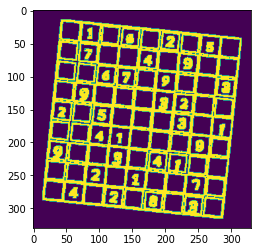

estimating angle from corners of edge pixel image:
four corners:
(14,42)
(315,273)
(273,14)
(42,315)
scoring lines via the amount of edge pixels captured by a line defined by polar coordinates (angle, distance)
lines found by scoring algorithm (both sets):


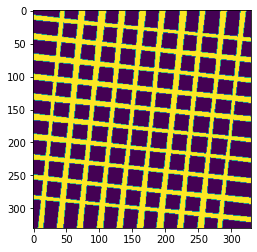

rotating image by the median of line angles found for one set:


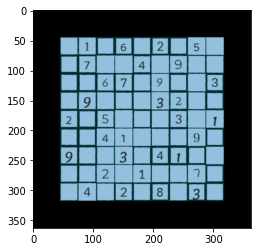


finding "edge" pixels via x and y gradient convolution for detecting changes in pixel intesity:


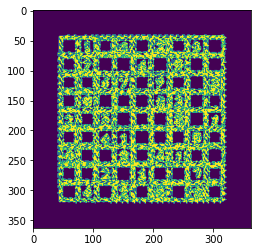


cropping straightened image based on minimum and maximum "edge" pixel indexes above

image cropped to size


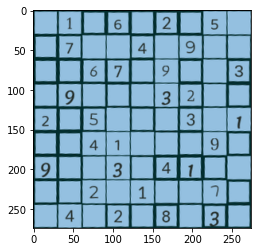

time for image 4985: 1.9594206809997559 seconds

finding "edge" pixels via x and y gradient convolution for detecting changes in pixel intesity:


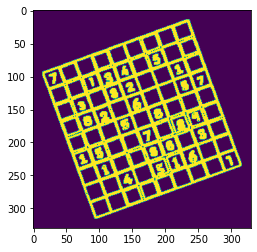

estimating angle from corners of edge pixel image:
four corners:
(14,231)
(315,96)
(93,14)
(231,315)
scoring lines via the amount of edge pixels captured by a line defined by polar coordinates (angle, distance)
lines found by scoring algorithm (both sets):


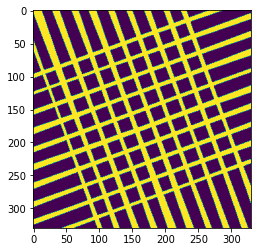

rotating image by the median of line angles found for one set:


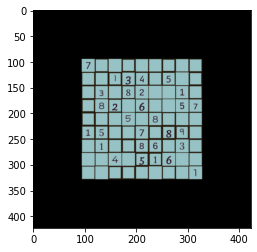


finding "edge" pixels via x and y gradient convolution for detecting changes in pixel intesity:


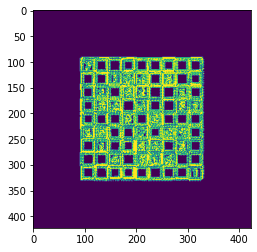


cropping straightened image based on minimum and maximum "edge" pixel indexes above

image cropped to size


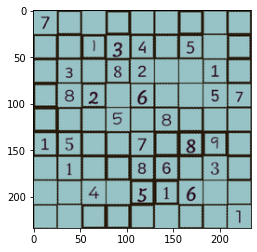

time for image 4986: 1.949655294418335 seconds

finding "edge" pixels via x and y gradient convolution for detecting changes in pixel intesity:


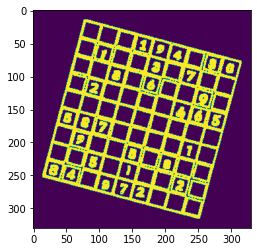

estimating angle from corners of edge pixel image:
four corners:
(14,77)
(315,247)
(247,14)
(77,315)
scoring lines via the amount of edge pixels captured by a line defined by polar coordinates (angle, distance)
lines found by scoring algorithm (both sets):


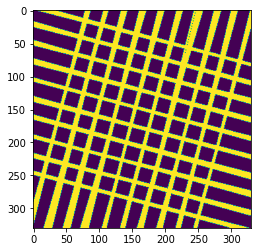

rotating image by the median of line angles found for one set:


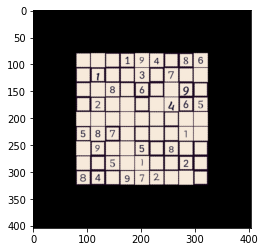


finding "edge" pixels via x and y gradient convolution for detecting changes in pixel intesity:


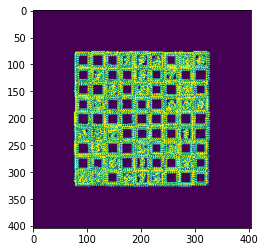


cropping straightened image based on minimum and maximum "edge" pixel indexes above

image cropped to size


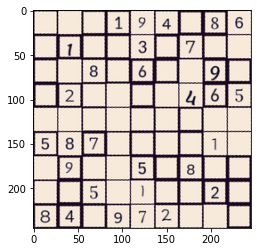

time for image 4987: 1.731255292892456 seconds

finding "edge" pixels via x and y gradient convolution for detecting changes in pixel intesity:


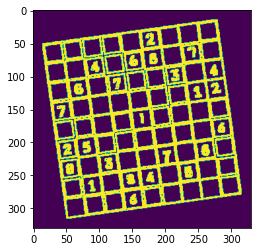

estimating angle from corners of edge pixel image:
four corners:
(14,269)
(315,55)
(50,14)
(269,315)
scoring lines via the amount of edge pixels captured by a line defined by polar coordinates (angle, distance)
lines found by scoring algorithm (both sets):


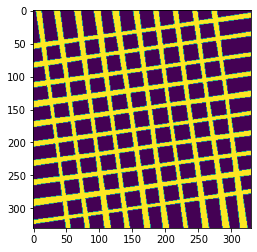

rotating image by the median of line angles found for one set:


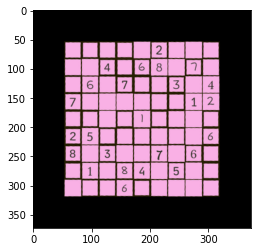


finding "edge" pixels via x and y gradient convolution for detecting changes in pixel intesity:


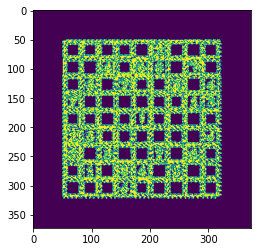


cropping straightened image based on minimum and maximum "edge" pixel indexes above

image cropped to size


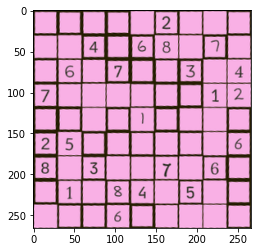

time for image 4988: 1.7988910675048828 seconds

finding "edge" pixels via x and y gradient convolution for detecting changes in pixel intesity:


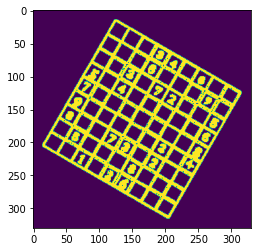

estimating angle from corners of edge pixel image:
four corners:
(14,123)
(315,202)
(202,14)
(123,315)
scoring lines via the amount of edge pixels captured by a line defined by polar coordinates (angle, distance)
lines found by scoring algorithm (both sets):


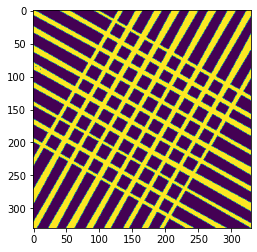

rotating image by the median of line angles found for one set:


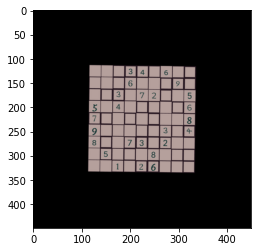


finding "edge" pixels via x and y gradient convolution for detecting changes in pixel intesity:


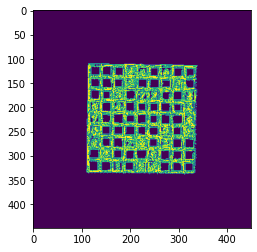


cropping straightened image based on minimum and maximum "edge" pixel indexes above

image cropped to size


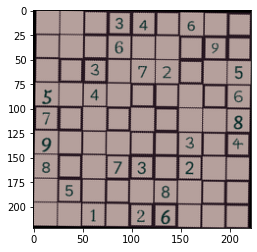

time for image 4989: 1.707733392715454 seconds

finding "edge" pixels via x and y gradient convolution for detecting changes in pixel intesity:


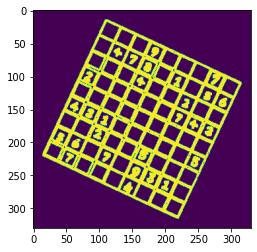

estimating angle from corners of edge pixel image:
four corners:
(14,109)
(315,217)
(217,14)
(109,315)
scoring lines via the amount of edge pixels captured by a line defined by polar coordinates (angle, distance)
lines found by scoring algorithm (both sets):


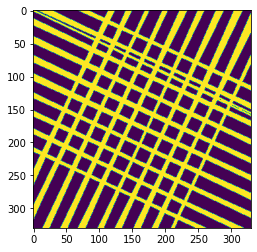

rotating image by the median of line angles found for one set:


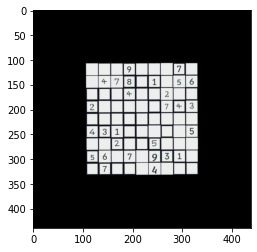


finding "edge" pixels via x and y gradient convolution for detecting changes in pixel intesity:


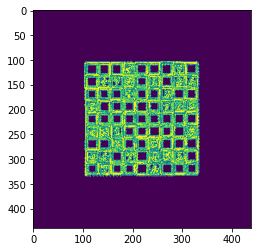


cropping straightened image based on minimum and maximum "edge" pixel indexes above

image cropped to size


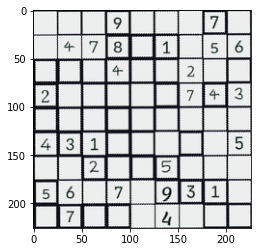

time for image 4990: 1.8297457695007324 seconds

finding "edge" pixels via x and y gradient convolution for detecting changes in pixel intesity:


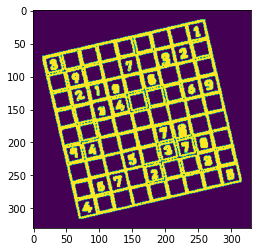

estimating angle from corners of edge pixel image:
four corners:
(14,253)
(315,75)
(69,14)
(253,315)
scoring lines via the amount of edge pixels captured by a line defined by polar coordinates (angle, distance)
lines found by scoring algorithm (both sets):


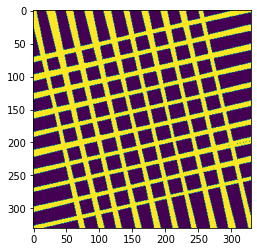

rotating image by the median of line angles found for one set:


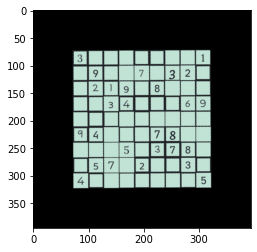


finding "edge" pixels via x and y gradient convolution for detecting changes in pixel intesity:


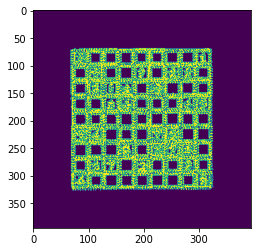


cropping straightened image based on minimum and maximum "edge" pixel indexes above

image cropped to size


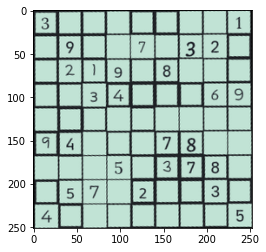

time for image 4991: 1.8399314880371094 seconds

finding "edge" pixels via x and y gradient convolution for detecting changes in pixel intesity:


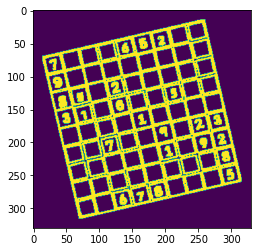

estimating angle from corners of edge pixel image:
four corners:
(14,253)
(315,72)
(69,14)
(253,315)
scoring lines via the amount of edge pixels captured by a line defined by polar coordinates (angle, distance)
lines found by scoring algorithm (both sets):


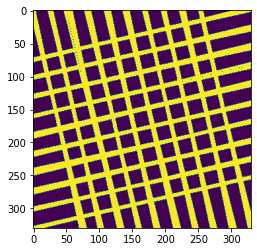

rotating image by the median of line angles found for one set:


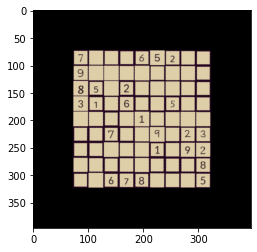


finding "edge" pixels via x and y gradient convolution for detecting changes in pixel intesity:


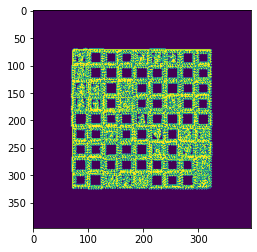


cropping straightened image based on minimum and maximum "edge" pixel indexes above

image cropped to size


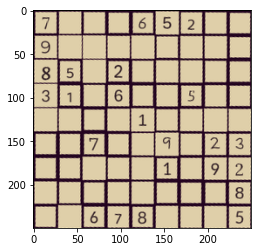

time for image 4992: 1.8297796249389648 seconds

finding "edge" pixels via x and y gradient convolution for detecting changes in pixel intesity:


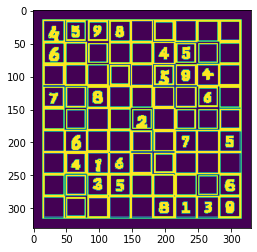

estimating angle from corners of edge pixel image:
four corners:
(14,14)
(315,14)
(14,14)
(14,315)


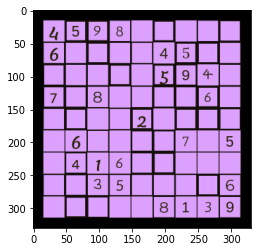


finding "edge" pixels via x and y gradient convolution for detecting changes in pixel intesity:


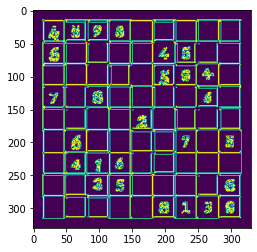


cropping straightened image based on minimum and maximum "edge" pixel indexes above

image cropped to size


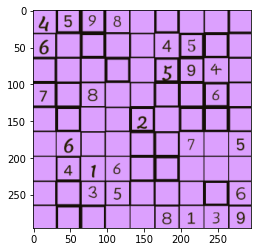

time for image 4993: 1.142632246017456 seconds

finding "edge" pixels via x and y gradient convolution for detecting changes in pixel intesity:


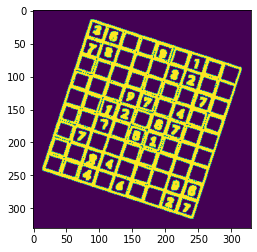

estimating angle from corners of edge pixel image:
four corners:
(14,87)
(315,237)
(237,14)
(87,315)
scoring lines via the amount of edge pixels captured by a line defined by polar coordinates (angle, distance)
lines found by scoring algorithm (both sets):


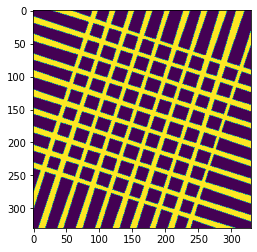

rotating image by the median of line angles found for one set:


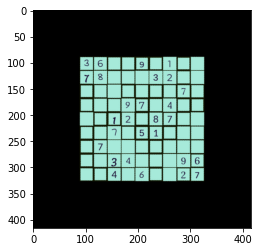


finding "edge" pixels via x and y gradient convolution for detecting changes in pixel intesity:


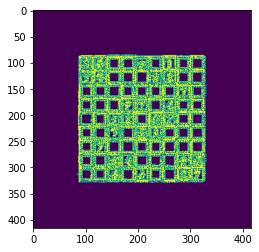


cropping straightened image based on minimum and maximum "edge" pixel indexes above

image cropped to size


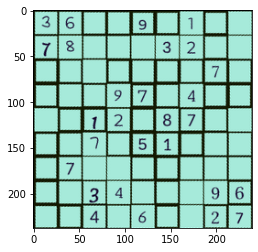

time for image 4994: 1.8412690162658691 seconds

finding "edge" pixels via x and y gradient convolution for detecting changes in pixel intesity:


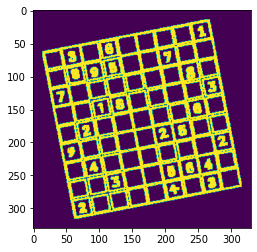

estimating angle from corners of edge pixel image:
four corners:
(14,259)
(315,69)
(62,14)
(259,315)
scoring lines via the amount of edge pixels captured by a line defined by polar coordinates (angle, distance)
lines found by scoring algorithm (both sets):


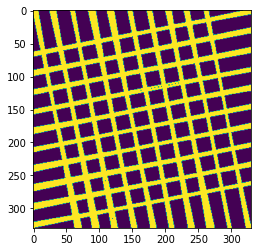

rotating image by the median of line angles found for one set:


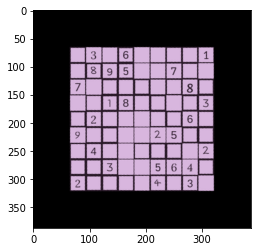


finding "edge" pixels via x and y gradient convolution for detecting changes in pixel intesity:


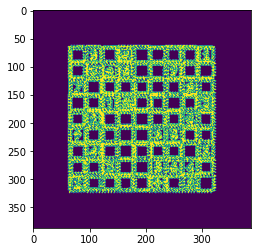


cropping straightened image based on minimum and maximum "edge" pixel indexes above

image cropped to size


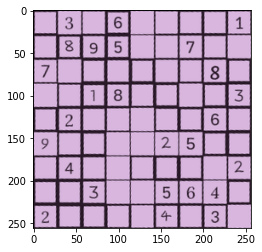

time for image 4995: 1.932788610458374 seconds

finding "edge" pixels via x and y gradient convolution for detecting changes in pixel intesity:


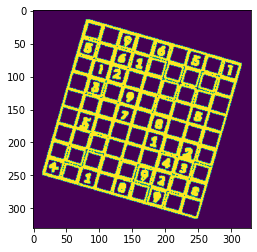

estimating angle from corners of edge pixel image:
four corners:
(14,80)
(315,243)
(243,14)
(80,315)
scoring lines via the amount of edge pixels captured by a line defined by polar coordinates (angle, distance)
lines found by scoring algorithm (both sets):


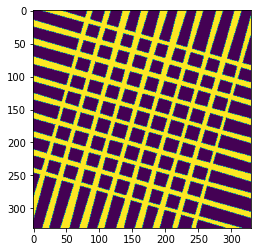

rotating image by the median of line angles found for one set:


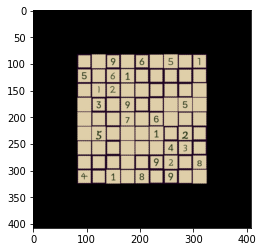


finding "edge" pixels via x and y gradient convolution for detecting changes in pixel intesity:


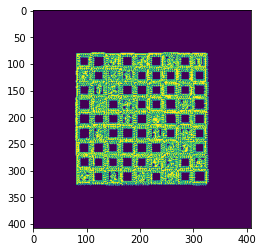


cropping straightened image based on minimum and maximum "edge" pixel indexes above

image cropped to size


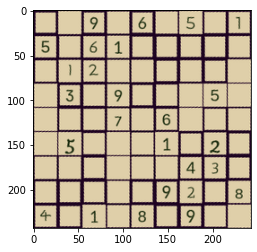

time for image 4996: 1.8992996215820312 seconds

finding "edge" pixels via x and y gradient convolution for detecting changes in pixel intesity:


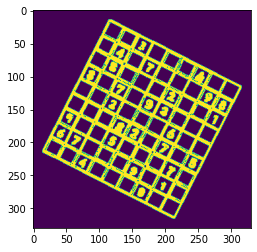

estimating angle from corners of edge pixel image:
four corners:
(14,114)
(315,211)
(211,14)
(114,315)
scoring lines via the amount of edge pixels captured by a line defined by polar coordinates (angle, distance)
lines found by scoring algorithm (both sets):


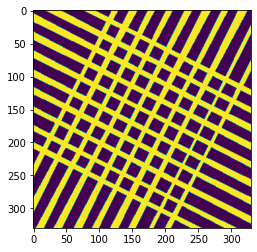

rotating image by the median of line angles found for one set:


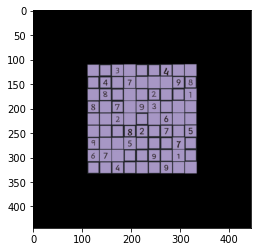


finding "edge" pixels via x and y gradient convolution for detecting changes in pixel intesity:


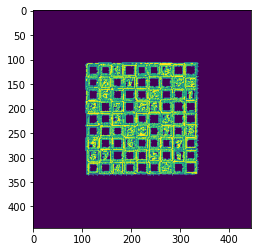


cropping straightened image based on minimum and maximum "edge" pixel indexes above

image cropped to size


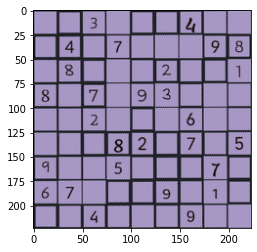

time for image 4997: 1.8357412815093994 seconds

finding "edge" pixels via x and y gradient convolution for detecting changes in pixel intesity:


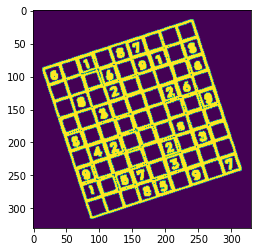

estimating angle from corners of edge pixel image:
four corners:
(14,237)
(315,89)
(87,14)
(237,315)
scoring lines via the amount of edge pixels captured by a line defined by polar coordinates (angle, distance)
lines found by scoring algorithm (both sets):


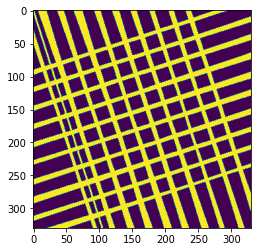

rotating image by the median of line angles found for one set:


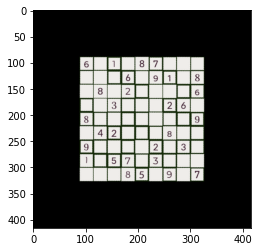


finding "edge" pixels via x and y gradient convolution for detecting changes in pixel intesity:


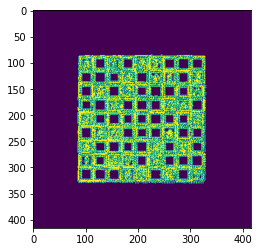


cropping straightened image based on minimum and maximum "edge" pixel indexes above

image cropped to size


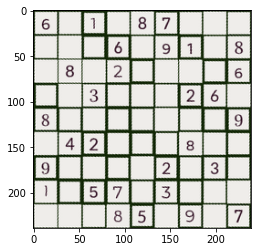

time for image 4998: 1.9066016674041748 seconds

finding "edge" pixels via x and y gradient convolution for detecting changes in pixel intesity:


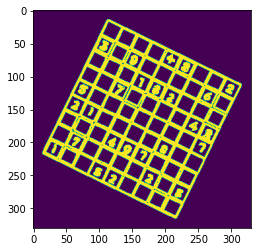

estimating angle from corners of edge pixel image:
four corners:
(14,112)
(315,214)
(214,14)
(111,315)
scoring lines via the amount of edge pixels captured by a line defined by polar coordinates (angle, distance)
lines found by scoring algorithm (both sets):


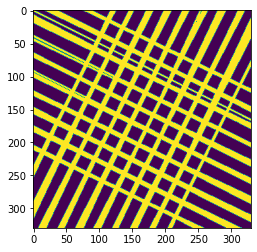

rotating image by the median of line angles found for one set:


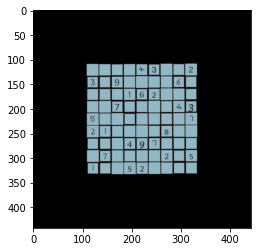


finding "edge" pixels via x and y gradient convolution for detecting changes in pixel intesity:


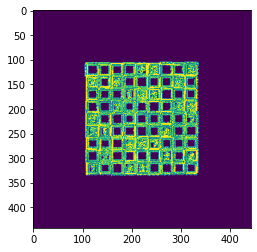


cropping straightened image based on minimum and maximum "edge" pixel indexes above

image cropped to size


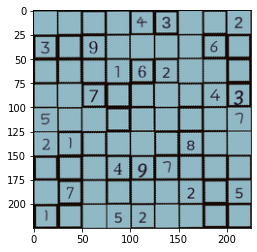

time for image 4999: 2.0834853649139404 seconds
algorithm complete with 1.8192153612772624 seconds per image


In [36]:
dir = "data/sample_train/" 
imgIDs = []
for i in range(15):
  imgIDs.append(i + 4985)

# first boolean = demo (show all steps)
# second boolean = test (timed with no prints), demo = False
# this configuration is slower and less accurate but informative to the process 
test_algo2(dir, imgIDs, True, True)

# Get Individual Cells

In [37]:
#get square by index in sudoku board, starting from (0,0) and ending at (8,8)
#image in raw form
def get_square_2d(x,y,image): 
  x1, x2=33*x, 33*(x+1)
  y1, y2=33*y, 33*(y+1)
  #if (x<3):
  x1+=4
  x2+=1
  #if (y<3):
  y1+=4
  y2+=1
  return image[x1:x2,y1:y2]

#get square by index of string in row-whatever-form of suduko, ind from 0-80 covering all 81 squares
def get_square(ind, image):
  return get_square_2d(int(ind/9),int(ind%9),image)

Demo Cells

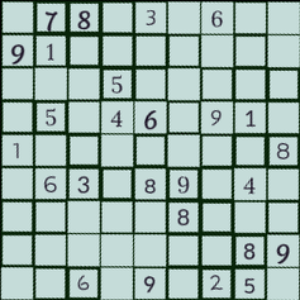

In [38]:
from google.colab.patches import cv2_imshow
path = "data/sample_test/4992.png"
image = get_image_formatted(path, demo = False, test = True)
cv2_imshow(image)
for i in range(81):
  cell = get_square(i, image)
  cv2_imshow(cell)

In [39]:
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(28, 28), cmap='gray')
    plt.title('y = '+ str(data_sample[1]))

# Set up Function to Solve Puzzle

In [40]:
#Solves row major form puzzles
def findSolution(sudokuPuzzle):
  sudokuPuzzle = list(sudokuPuzzle)

  board = [ [0]*9 for _ in range(9) ]
  for i in range(9):
    for j in range(9):
      if(sudokuPuzzle[9*i + j] != '_'):
        board[i][j] = ord(sudokuPuzzle[9*i + j]) - ord('0')

  puzzle = Sudoku(3, 3, board=board)
  solution = puzzle.solve()

  # puzzle.show()
  # solution.show()

  if solution.board[0][0] == None:
    return "no solution"

  solutionGrid = [[str(j) for j in i] for i in solution.board]
  solutionString = ""
  for row in solutionGrid:
    solutionString += "".join(row)

  return solutionString

# Prepare to Read Cell Data

In [41]:

from skimage.segmentation import clear_border
from tensorflow.keras.preprocessing.image import img_to_array
import math

# NOT USED
def extract_digit(cell,):
# apply automatic thresholding to the cell and then clear any
    # connected borders that touch the border of the cell
    #thresh = cv2.threshold(cell, 175, 255,
        #cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
   #thresh = clear_border(thresh)
    
    cnts = cv2.findContours(cell.copy(), cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE)
    #cv2_imshow(thresh)
    cnts = imutils.grab_contours(cnts)
    if len(cnts) == 0:
        return None
    c = max(cnts, key=cv2.contourArea)
    mask = np.zeros(cell.shape, dtype="uint8")
    cv2.drawContours(mask, [c], -1, 255, -1)
    
    (h, w) = cell.shape
    percentFilled = cv2.countNonZero(mask) / float(w * h)
    # if less than 3% of the mask is filled then we are looking at
    # noise and can safely ignore the contour
    if percentFilled < 0.03:
        return None
    # apply the mask to the thresholded cell
    
    digit = cv2.bitwise_and(cell, cell, mask=mask)
    #digit = center_image(digit)
    return digit

In [42]:
#Find shift to mid by weight
def getBestShift(img):
    cy,cx = ndimage.measurements.center_of_mass(img)

    rows,cols = img.shape
    shiftx = np.round(cols/2.0-cx).astype(int)
    shifty = np.round(rows/2.0-cy).astype(int)

    return shiftx,shifty

In [43]:
#shift image using translation matrix
def shift(img,sx,sy):
    rows,cols = img.shape
    M = np.float32([[1,0,sx],[0,1,sy]])
    shifted = cv2.warpAffine(img,M,(cols,rows))
    return shifted

In [44]:
#Determine if cell is completely empty
def is_empty(cell): 
  # print(cell)
  cell = cv2.cvtColor(cell, cv2.COLOR_BGR2GRAY)
  ret,cell = cv2.threshold(cell,150,255,cv2.THRESH_BINARY)
  cell = np.invert(cell)
  #26x26 cell
  cell = cell[5:20, 5:20] #15x15 cell w/out borders
  for i in range(15):
    for j in range(15):
      if (cell[i][j]!=0):
        return False
  return True

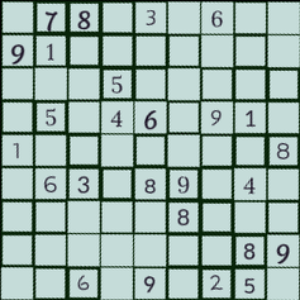

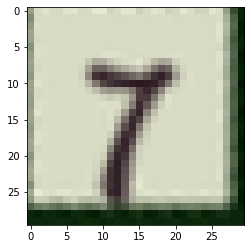

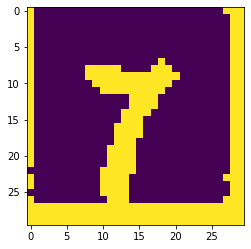

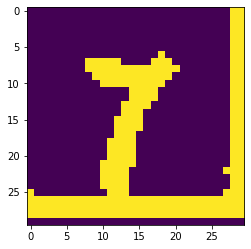

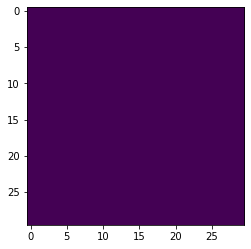

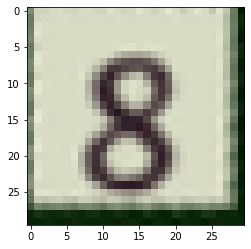

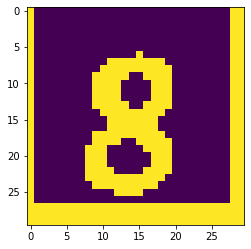

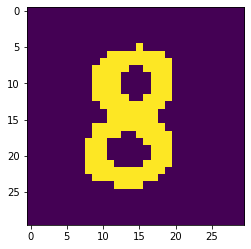

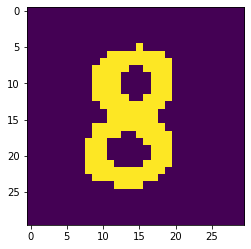

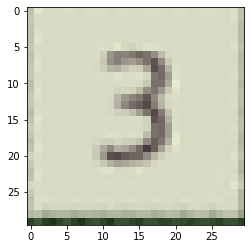

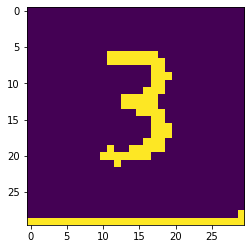

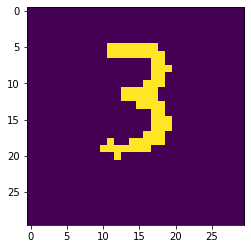

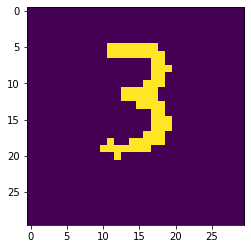

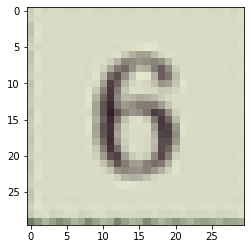

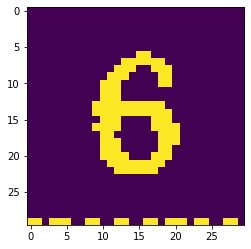

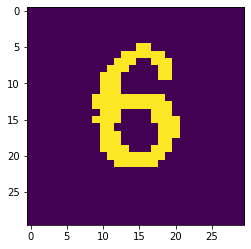

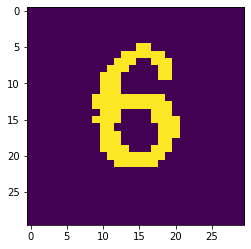

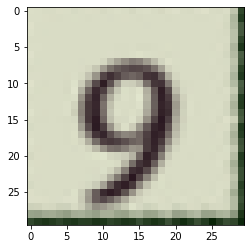

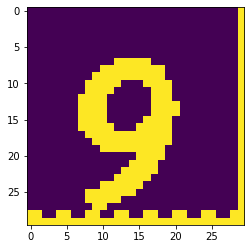

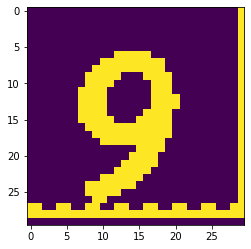

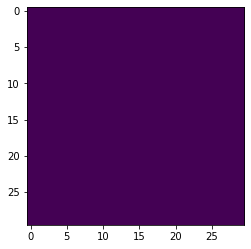

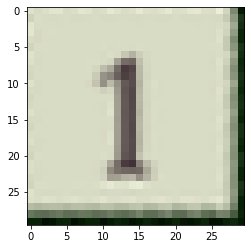

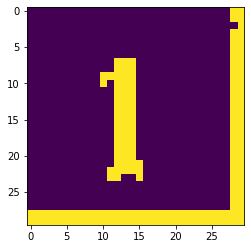

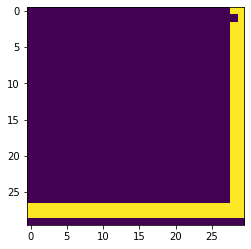

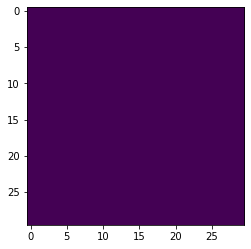

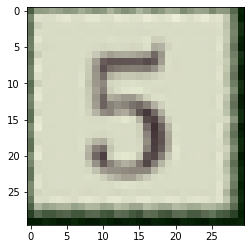

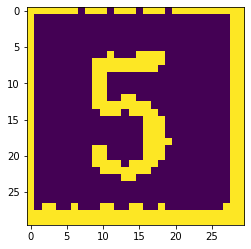

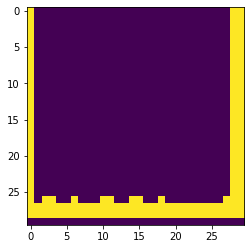

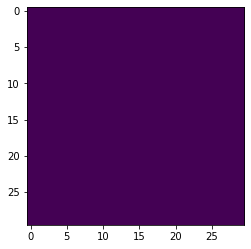

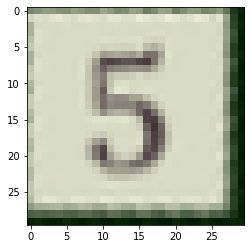

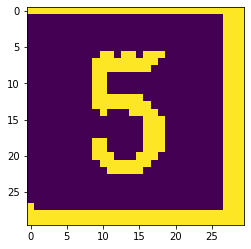

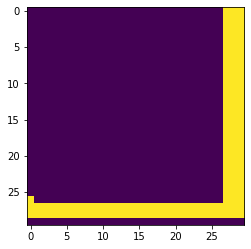

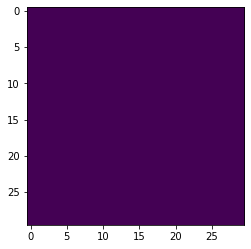

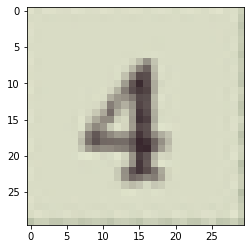

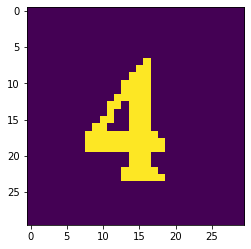

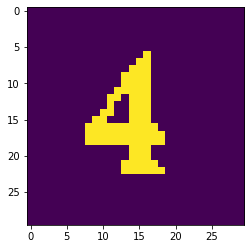

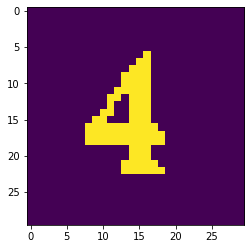

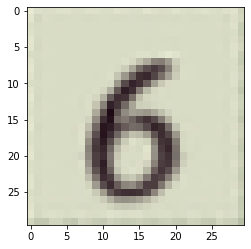

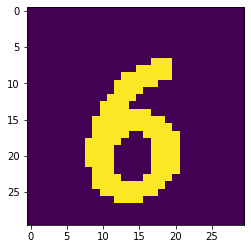

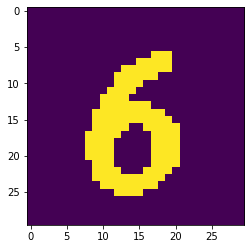

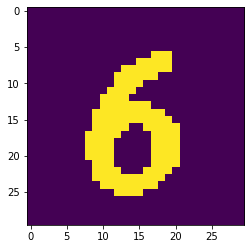

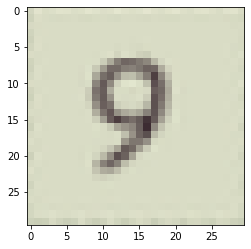

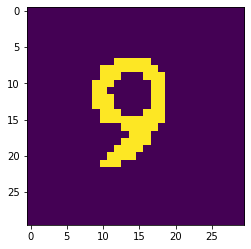

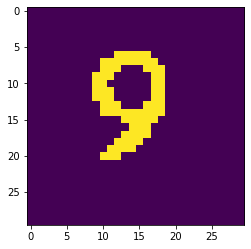

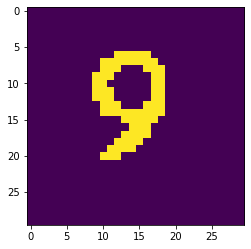

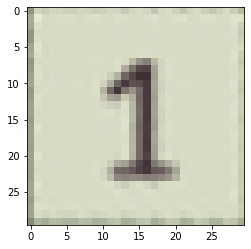

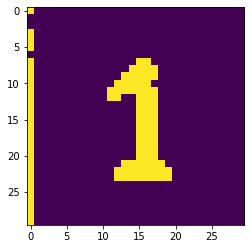

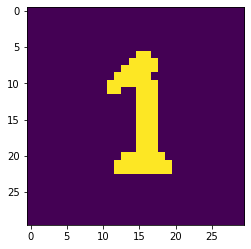

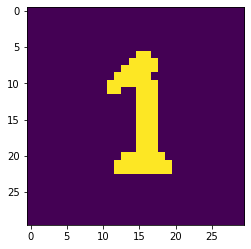

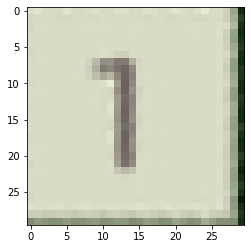

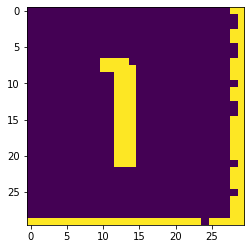

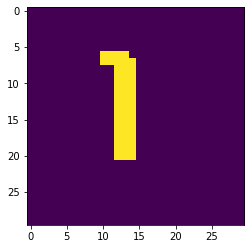

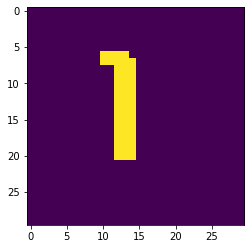

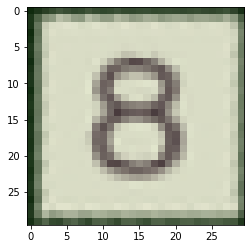

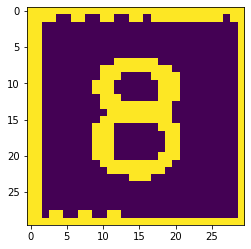

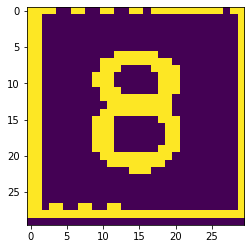

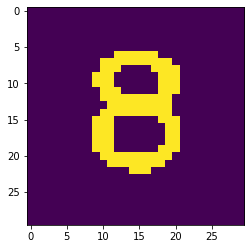

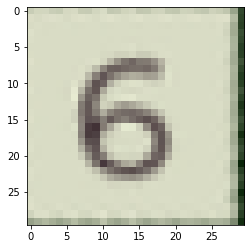

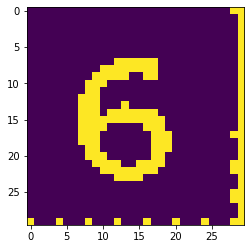

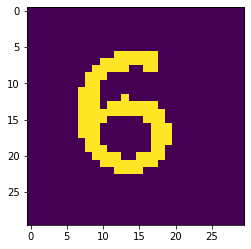

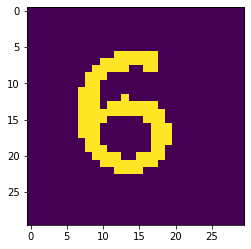

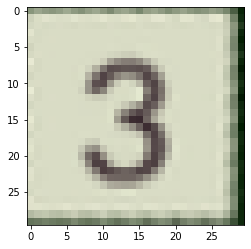

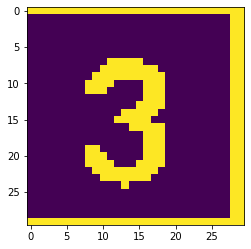

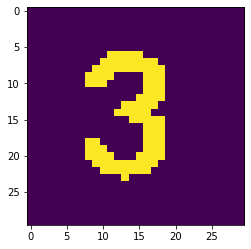

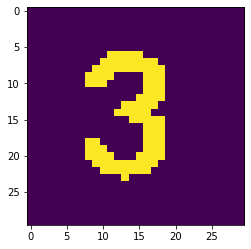

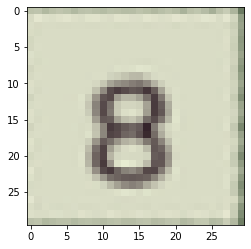

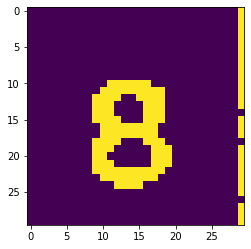

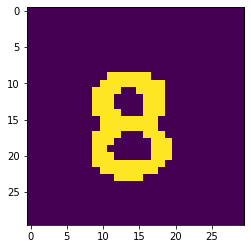

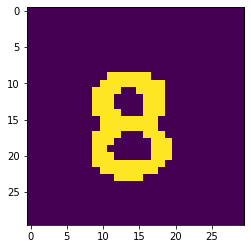

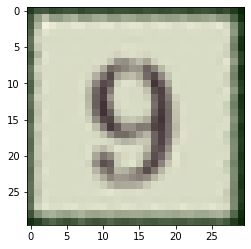

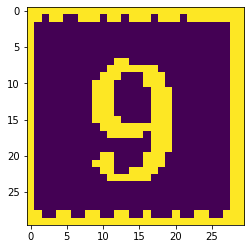

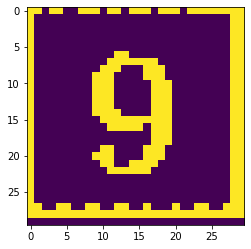

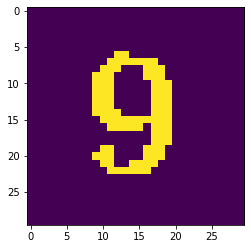

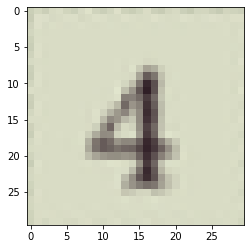

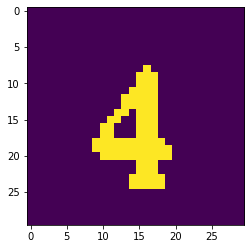

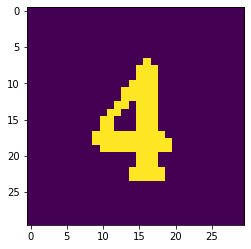

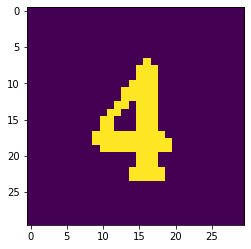

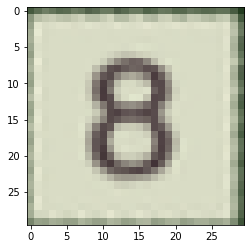

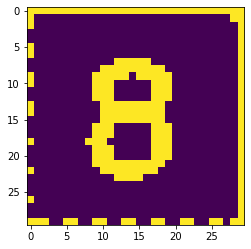

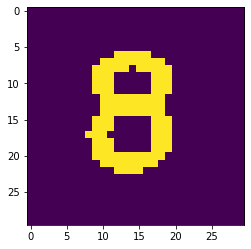

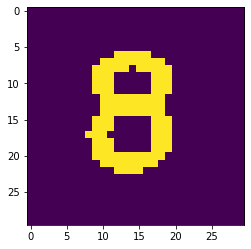

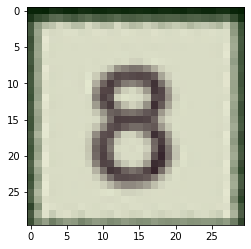

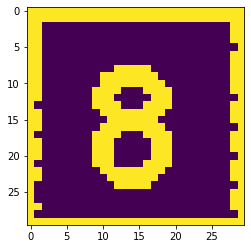

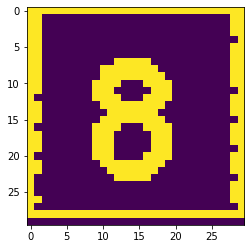

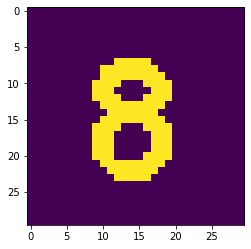

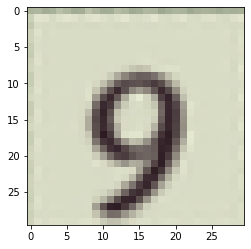

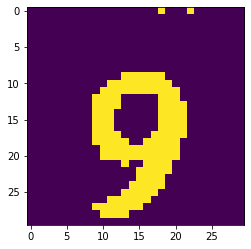

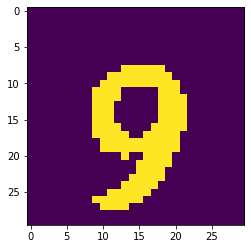

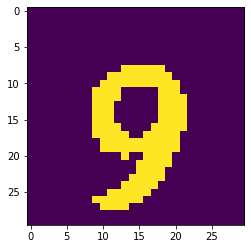

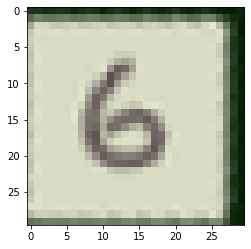

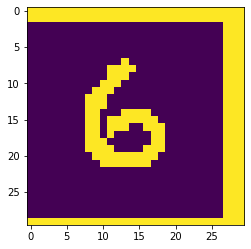

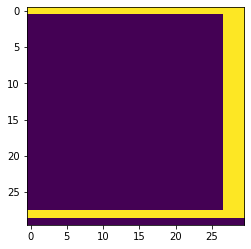

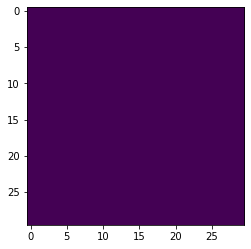

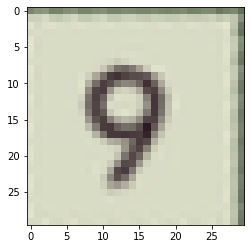

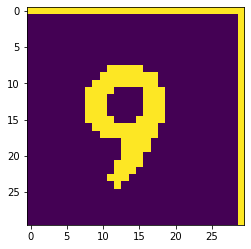

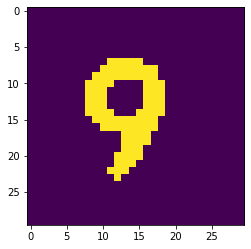

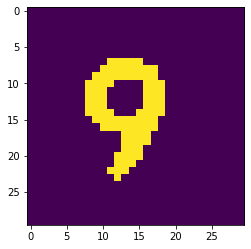

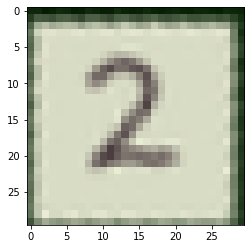

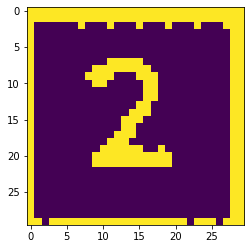

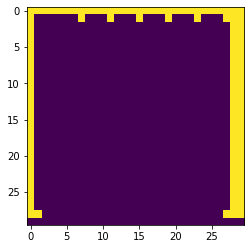

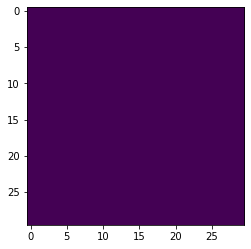

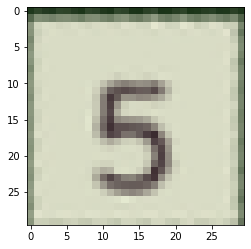

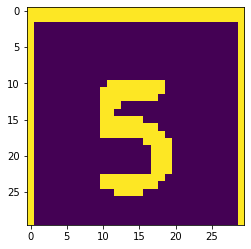

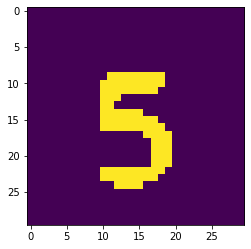

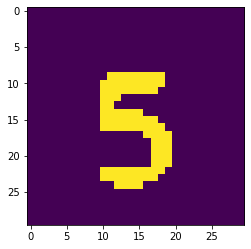

In [45]:
#Test go over cells
from google.colab.patches import cv2_imshow
path = "data/sample_test/4992.png"
image = get_image_formatted(path, demo = False, test = True)
cv2_imshow(image)
for i in range(81):
  cell = get_square(i, image)

  if is_empty(cell):
    continue
  print_img(cell)
  cell = cv2.cvtColor(cell, cv2.COLOR_BGR2GRAY)
  ret,cell = cv2.threshold(cell,160,255,cv2.THRESH_BINARY)
  cell = np.invert(cell)
  print_img(cell)
  cell = extract_digit(cell)
  cell = shift(cell,0, -1)
  print_img(cell)
  cell = clear_border(cell)

  
  print_img(cell)

# Use Pretrained Model to Read in Cell Data

In [46]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform

print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Python version: 3.7.11
Tensorflow version: 1.15.2
Keras version: 2.2.4-tf


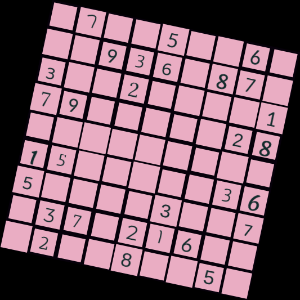

NameError: ignored

In [47]:
#Demo Image cleanup and show network predictions
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
from torchvision import models, transforms, datasets
from google.colab.patches import cv2_imshow
path = "data/sample_test/4997.png"
img=cv2.imread(path)
cv2_imshow(img)

image = get_image_formatted(path, demo = False, test = True)

part = transforms.Compose([transforms.ToPILImage(),transforms.Resize((28, 28))])

toImage =  transforms.Compose([transforms.ToTensor()])

Softmax_fn=nn.Softmax(dim=-1)

repr = '145675719129737957612623576375'

sol = ''

def clear_border1(cell):
  for i in range(28):
    c = 0
    for j in range(28): 
       if (cell[i][j] == 255):
         c += 1
    if c >= 24:      
       for j in range(28): 
          cell[i][j] = 0

def decouple(cell):
  for i in range(5,23):
    cell[27][i] = 0
  return cell


for i in range(81):
  cell = get_square(i, image)
  if is_empty(cell):
    continue
  #same format as format cell  
  cell = cv2.cvtColor(cell, cv2.COLOR_BGR2GRAY)
  ret,cell = cv2.threshold(cell,170,255,cv2.THRESH_BINARY)
  cell = np.invert(cell)
  cv2_imshow(cell)
  cv2_imshow(cell)
  clear_border1(cell)
  cell = decouple(cell)  
  cell = clear_border(cell)
  cv2_imshow(cell)
  shiftx, shifty = getBestShift(cell)
  cell = shift(cell, shiftx, shifty )
  cell = part(cell)
  cell = np.array(cell)
  cv2_imshow(cell)
  cell = Image.fromarray(cell)
  cell = toImage(cell)
  new = cell.reshape(1, 28, 28, 1)
  #same format as solve puzzle
  pred =  model.predict(new, batch_size=1)
  z = pred.argmax()
  yhat = z
  sol += str(z)  
  show_data((cell, i))
  plt.show()
  print("yhat:", yhat)
  print("probability of class ", torch.max(Softmax_fn(cell)).item())
print(repr)    
print(sol)

'145675719129737957612623576375'

# Read and Solve Sudoku Puzzle

In [48]:
def format_cell(cell):
  part = transforms.Compose([transforms.ToPILImage(),transforms.Resize((28, 28))])
  toImage =  transforms.Compose([transforms.ToTensor()])
  #Binarize the image
  cell = cv2.cvtColor(cell, cv2.COLOR_BGR2GRAY)
  ret,cell = cv2.threshold(cell,140,255,cv2.THRESH_BINARY)
  cell = np.invert(cell)

  #clear border preprocessing
  clear_border1(cell)
  cell = decouple(cell) 

  #Removes all pixels touching the border
  cell = clear_border(cell)
  
  #Shift image to center of screen
  shiftx, shifty = getBestShift(cell)
  cell = shift(cell, shiftx, shifty )
  
  #format to NN predict
  cell = part(cell)
  cell = np.array(cell)
  cell = Image.fromarray(cell)
  cell = toImage(cell)
  new = cell.reshape(1, 28, 28, 1)
  return new

In [49]:
def get_solution(path, model, sol):
  plt.imshow(plt.imread(path)) 
  #straighten
  image_formatted = get_image_formatted(path, demo = False, test = True)  
  representation = ''  

  #Iterate over each cell
  for j in range(81):        
      #Get individual square
      cell = get_square(j, image_formatted)           
      #check if empty square
      if is_empty(cell):
        representation += '_'
      else: 
        #process image to be inputed into network
        cell = format_cell(cell)
        #predicition
        pred = model.predict(cell, batch_size=1)
        
        #Add to row major form
        answer = str(pred.argmax())
        representation += answer  
  #Solve Puzzle
  our_sol = findSolution(representation)

  print("our representation:", representation)  
  print("our solution:      ", our_sol)
  print("solution:          ", sol)
  #Verify Solution
  if our_sol == sol:
    print("Correct!")
    return 1
  print("Inccorect")  
  return 0  

In [50]:
#Demo get_solution
get_solution("data/sample_test/4997.png",model, "874159362219364875365278941793416528642835719158792436581643297937521684426987153")

NameError: ignored

In [51]:
#Run solver for range of test images
def NN_sample_test(num1, num2):
  board_dataset = []
  dir = 'data/demo_test/' 
  labels = pd.read_csv('data/demo_test/labels.csv')
  correct = 0
  for i in range(num1, num2):
    name = str(i)
    length = len(name)
    if length < 4:      
      zero_pad = '0' * (4 - length)
      name = zero_pad + name
    name = dir + "Copy of " + name + ".png"
    img=cv2.imread(name)
    cv2_imshow(img)
    print(name)
    sol = labels['solution'][i]
    correct += get_solution(name, model, sol)
  print("acc score =", correct / (num2 - num1))  

In [52]:
NN_sample_test(4901, 4902)

FileNotFoundError: ignored

In [ ]:
NN_sample_test(4900, 5000)